# Decision Tree Classification - ML2 Spotify Dataset

## Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_curve, roc_auc_score, auc,
    precision_score, recall_score, f1_score, accuracy_score
)

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)
%matplotlib inline

RANDOM_STATE = 42 # so that we can repeat results
np.random.seed(RANDOM_STATE)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Setup complete")

✓ Setup complete


## Load & Explore Data

In [ ]:
df = pd.read_csv('spotify-songs-preprocessed.csv')

print(f"Data shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Data shape: (2199, 30)

Columns: ['artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'album_songs', 'popular', 'genre_pop', 'genre_rap', 'genre_dance pop', 'genre_hip hop', 'genre_pop rap', 'genre_rock', 'genre_r&b', 'genre_trap', 'genre_urban contemporary', 'genre_southern hip hop', 'genre_modern rock', 'genre_electro', 'genre_edm', 'genre_canadian pop', 'genre_house']


In [ ]:
print("Dataset Info:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_popularity         2199 non-null   int64  
 1   danceability              2199 non-null   float64
 2   energy                    2199 non-null   float64
 3   key                       2199 non-null   float64
 4   loudness                  2199 non-null   float64
 5   mode                      2199 non-null   float64
 6   speechiness               2199 non-null   float64
 7   acousticness              2199 non-null   float64
 8   instrumentalness          2199 non-null   float64
 9   liveness                  2199 non-null   float64
 10  valence                   2199 non-null   float64
 11  tempo                     2199 non-null   float64
 12  duration_ms               2199 non-null   float64
 13  album_songs               2199 non-null   int64  

In [ ]:
df.describe()

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_songs,genre_pop,genre_rap,genre_dance pop,genre_hip hop,genre_pop rap,genre_rock,genre_r&b,genre_trap,genre_urban contemporary,genre_southern hip hop,genre_modern rock,genre_electro,genre_edm,genre_canadian pop,genre_house
count,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000,2199.000
mean,73.323,0.660,0.690,5.262,72.909,0.600,0.099,0.159,0.013,0.173,0.531,120.449,224997.773,1.868,0.748,0.285,0.233,0.211,0.138,0.135,0.110,0.091,0.088,0.060,0.058,0.056,0.052,0.051,0.050
std,12.039,0.141,0.165,3.623,15.657,0.490,0.093,0.206,0.081,0.132,0.227,27.711,41938.705,1.268,0.434,0.452,0.423,0.408,0.345,0.342,0.312,0.288,0.284,0.238,0.233,0.230,0.223,0.221,0.218
min,29.000,0.162,0.052,0.000,-56.000,0.000,0.022,0.000,0.000,0.021,0.038,60.019,97393.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,66.000,0.573,0.585,2.000,63.000,0.000,0.039,0.017,0.000,0.090,0.357,98.310,199542.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,75.000,0.671,0.709,5.000,73.000,1.000,0.058,0.070,0.000,0.120,0.534,120.000,220734.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,83.000,0.760,0.816,8.000,83.000,1.000,0.118,0.223,0.000,0.218,0.716,137.049,245326.500,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,100.000,0.975,0.999,11.000,132.000,1.000,0.576,0.978,0.925,0.843,0.974,210.857,688453.000,8.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
df.head()

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_songs,popular,genre_pop,genre_rap,genre_dance pop,genre_hip hop,genre_pop rap,genre_rock,genre_r&b,genre_trap,genre_urban contemporary,genre_southern hip hop,genre_modern rock,genre_electro,genre_edm,genre_canadian pop,genre_house
0,71,0.853,0.606,0.000,66.000,1.000,0.071,0.056,0.000,0.313,0.654,94.759,227600.000,2,True,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,69,0.514,0.911,1.000,30.000,0.000,0.410,0.056,0.000,0.775,0.619,161.109,254027.000,3,False,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,88,0.780,0.768,6.000,63.000,0.000,0.238,0.037,0.000,0.518,0.507,80.063,404107.000,1,True,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,71,0.766,0.563,9.000,87.000,0.000,0.034,0.026,0.683,0.115,0.964,126.007,230640.000,2,True,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,75,0.754,0.811,5.000,56.000,1.000,0.056,0.018,0.000,0.654,0.639,109.902,267960.000,1,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Target Variable Prep


In [ ]:
TARGET_COLUMN = 'popular'  # target column
POSITIVE_CLASS = True  # Value for representing the positive class

# Back up to create binary target (1 = positive class, 0 = negative class)
df['target_binary'] = (df[TARGET_COLUMN] == POSITIVE_CLASS).astype(int)

print("Class Distribution:")
print(df['target_binary'].value_counts())
print(f"\nPositive class proportion: {df['target_binary'].mean():.2%}")

Class Distribution:
target_binary
0    1619
1     580
Name: count, dtype: int64

Positive class proportion: 26.38%


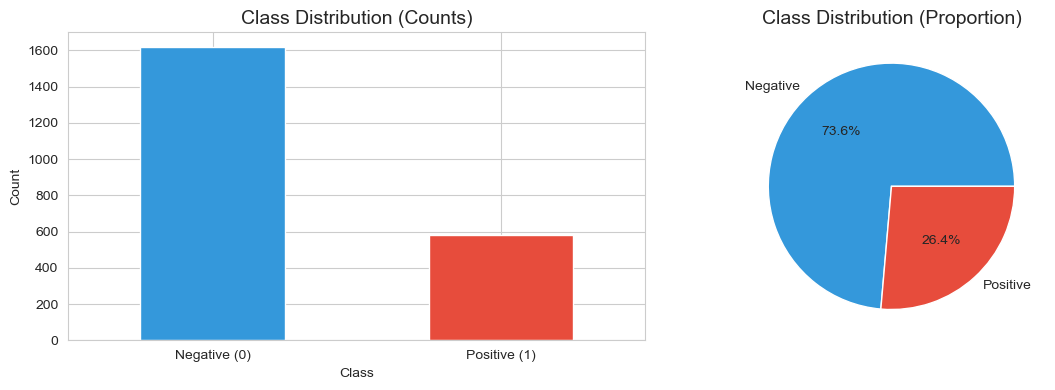

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df['target_binary'].value_counts().plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'])
ax1.set_title('Class Distribution (Counts)', fontsize=14)
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Negative (0)', 'Positive (1)'], rotation=0)

df['target_binary'].value_counts().plot(kind='pie', ax=ax2, autopct='%.1f%%', 
                                         colors=['#3498db', '#e74c3c'], labels=['Negative', 'Positive'])
ax2.set_title('Class Distribution (Proportion)', fontsize=14)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## Feature Selection and Preprocess


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_columns = [col for col in numeric_cols if col not in [TARGET_COLUMN, 'target_binary']]

print(f"Selected {len(feature_columns)} features:")
print(feature_columns[:10], '...' if len(feature_columns) > 10 else '')

Selected 29 features:
['artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'] ...


In [ ]:

missing_summary = df[feature_columns + ['target_binary']].isnull().sum()
if missing_summary.sum() > 0:
    print("Missing values found:")
    print(missing_summary[missing_summary > 0])
    # TODO: Handle missing values (e.g., imputation or removal)
else:
    print("✓ No missing values in selected features")

✓ No missing values in selected features


## Train-Test Split


In [ ]:
X = df[feature_columns].copy()
y = df['target_binary'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE, # or 42 or whatever to be able to repeat results
    stratify=y  # keep class proportions in both sets
)

print("Data Split Summary:")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X):.1%})")
print(f"Test set:     {X_test.shape[0]} samples ({X_test.shape[0]/len(X):.1%})")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\nClass balance (train): {y_train.mean():.2%} positive")
print(f"Class balance (test):  {y_test.mean():.2%} positive")

Data Split Summary:
Training set: 1759 samples (80.0%)
Test set:     440 samples (20.0%)

Features: 29

Class balance (train): 26.38% positive
Class balance (test):  26.36% positive


## Baseline Model

In [ ]:
baseline_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
baseline_tree.fit(X_train, y_train)

y_pred_baseline = baseline_tree.predict(X_test)

print("Baseline Model Performance:")
print("=" * 50)
print(f"Training Accuracy:   {baseline_tree.score(X_train, y_train):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Test Recall:         {recall_score(y_test, y_pred_baseline):.4f}")
print(f"Test F1:             {f1_score(y_test, y_pred_baseline):.4f}")
print(f"\nTree depth:          {baseline_tree.get_depth()}")
print(f"Number of leaves:    {baseline_tree.get_n_leaves()}")
print(f"Number of nodes:     {baseline_tree.tree_.node_count}")

Baseline Model Performance:
Training Accuracy:   0.9989
Test Accuracy:       0.7045
Test Recall:         0.5000
Test F1:             0.4715

Tree depth:          19
Number of leaves:    272
Number of nodes:     543


## Hyperparameter Tuning

GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [range(1, 30), None],
    'min_samples_split': range(1,20),
    'min_samples_leaf': range(1,15),
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_STATE),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1 score
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

print("Starting hyperparameter tuning...\n")
grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print("=" * 50)
for param, value in grid_search.best_params_.items():
    print(f"{param:20s}: {value}")
print(f"\nBest CV F1 Score: {grid_search.best_score_:.4f}")

Starting hyperparameter tuning...

Fitting 5 folds for each of 1064 candidates, totalling 5320 fits

Best Parameters:
criterion           : gini
max_depth           : None
min_samples_leaf    : 13
min_samples_split   : 2

Best CV F1 Score: 0.4374


In [ ]:
optimized_tree = grid_search.best_estimator_

y_pred_optimized = optimized_tree.predict(X_test)
y_pred_proba = optimized_tree.predict_proba(X_test)[:, 1]

print("\nModel Comparison:")
print("=" * 50)
print(f"{'Metric':<20} {'Baseline':<12} {'Optimized':<12}")
print("-" * 50)
print(f"{'Train Accuracy':<20} {baseline_tree.score(X_train, y_train):<12.4f} {optimized_tree.score(X_train, y_train):<12.4f}")
print(f"{'Test Accuracy':<20} {accuracy_score(y_test, y_pred_baseline):<12.4f} {accuracy_score(y_test, y_pred_optimized):<12.4f}")
print(f"{'F1 Score':<20} {f1_score(y_test, y_pred_baseline):<12.4f} {f1_score(y_test, y_pred_optimized):<12.4f}")
print(f"{'Tree Depth':<20} {baseline_tree.get_depth():<12} {optimized_tree.get_depth():<12}")
print(f"{'Number of Leaves':<20} {baseline_tree.get_n_leaves():<12} {optimized_tree.get_n_leaves():<12}")


Model Comparison:
Metric               Baseline     Optimized   
--------------------------------------------------
Train Accuracy       0.9989       0.8272      
Test Accuracy        0.7045       0.7091      
F1 Score             0.4715       0.4019      
Tree Depth           19           12          
Number of Leaves     272          80          


## Feature Importance Analysis

In [ ]:
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': optimized_tree.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print("=" * 50)
print(feature_importance_df.head(15).to_string(index=False))

Top 15 Most Important Features:
          feature  importance
artist_popularity       0.330
     acousticness       0.127
         liveness       0.101
         loudness       0.075
          valence       0.074
      duration_ms       0.069
              key       0.045
      speechiness       0.028
     danceability       0.028
       genre_rock       0.027
    genre_hip hop       0.019
            tempo       0.018
        genre_r&b       0.016
      album_songs       0.015
genre_modern rock       0.014


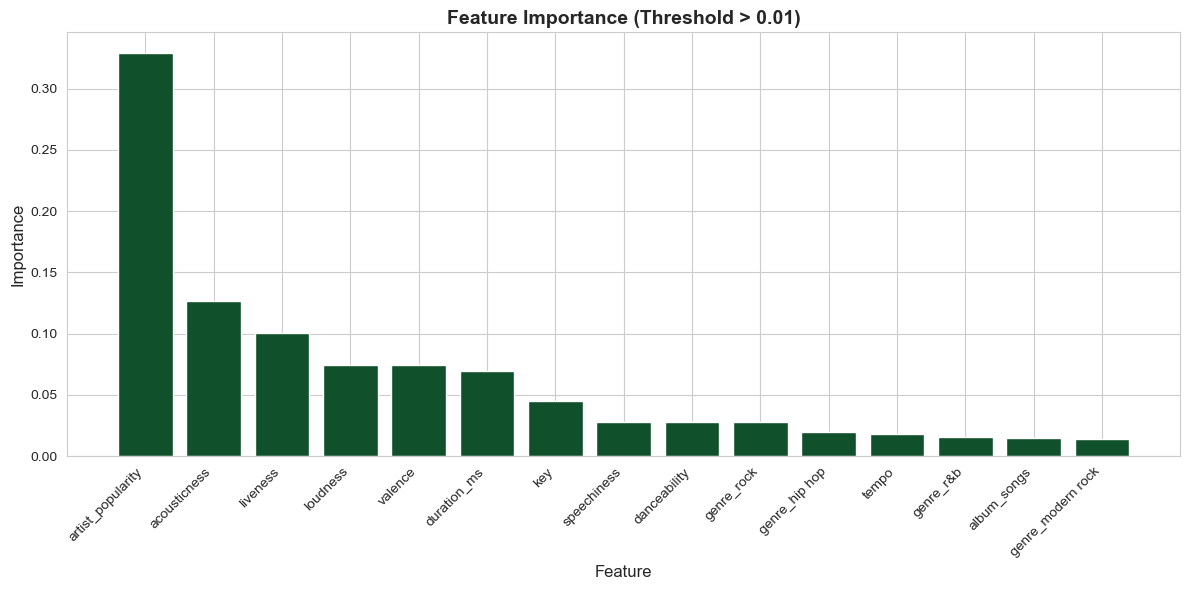


Showing 15 features with importance > 0.01


In [ ]:
important_features = feature_importance_df[feature_importance_df['importance'] > 0.01]

plt.figure(figsize=(12, 6))
plt.bar(range(len(important_features)), important_features['importance'], color="#10502a")
plt.xticks(range(len(important_features)), important_features['feature'], rotation=45, ha='right')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance (Threshold > 0.01)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nShowing {len(important_features)} features with importance > 0.01")

## Model Evaluation

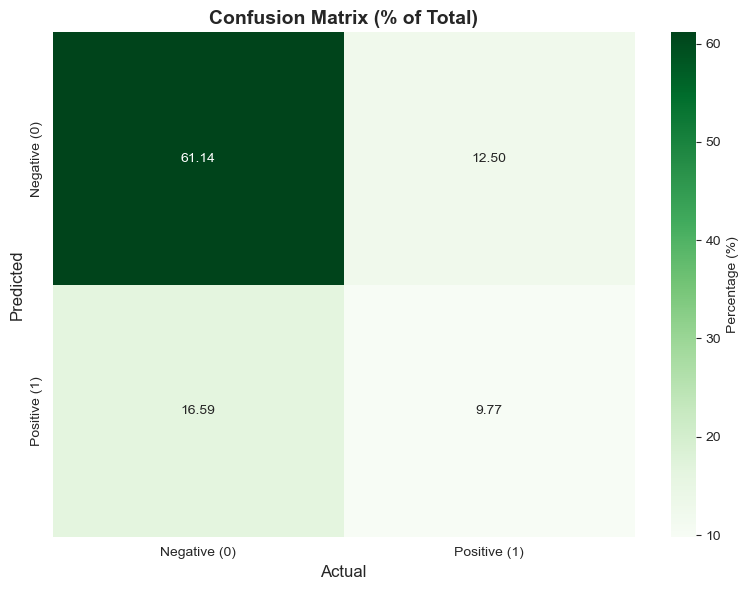


Confusion Matrix Breakdown:
True Negatives:   269  (61.14%)
False Positives:   55  (12.50%)
False Negatives:   73  (16.59%)
True Positives:    43  ( 9.77%)


In [ ]:
cm = confusion_matrix(y_test, y_pred_optimized)
cm_percentage = (cm.astype('float') / cm.sum()) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Greens', 
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'],
            cbar_kws={'label': 'Percentage (%)'})
plt.title('Confusion Matrix (% of Total)', fontsize=14, fontweight='bold')
plt.ylabel('Predicted', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix Breakdown:")
print("=" * 50)
print(f"True Negatives:  {tn:4d}  ({cm_percentage[0,0]:5.2f}%)")
print(f"False Positives: {fp:4d}  ({cm_percentage[0,1]:5.2f}%)")
print(f"False Negatives: {fn:4d}  ({cm_percentage[1,0]:5.2f}%)")
print(f"True Positives:  {tp:4d}  ({cm_percentage[1,1]:5.2f}%)")

In [ ]:
print("\nDetailed Performance Metrics:")
print("=" * 50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimized):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_optimized):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_optimized):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\n" + "=" * 50)
print("Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred_optimized, 
                          target_names=['Negative (0)', 'Positive (1)']))


Detailed Performance Metrics:
Accuracy:  0.7091
Precision: 0.4388
Recall:    0.3707
F1-Score:  0.4019
ROC-AUC:   0.6607

Classification Report:
              precision    recall  f1-score   support

Negative (0)       0.79      0.83      0.81       324
Positive (1)       0.44      0.37      0.40       116

    accuracy                           0.71       440
   macro avg       0.61      0.60      0.60       440
weighted avg       0.69      0.71      0.70       440



## ROC Curve Analysis

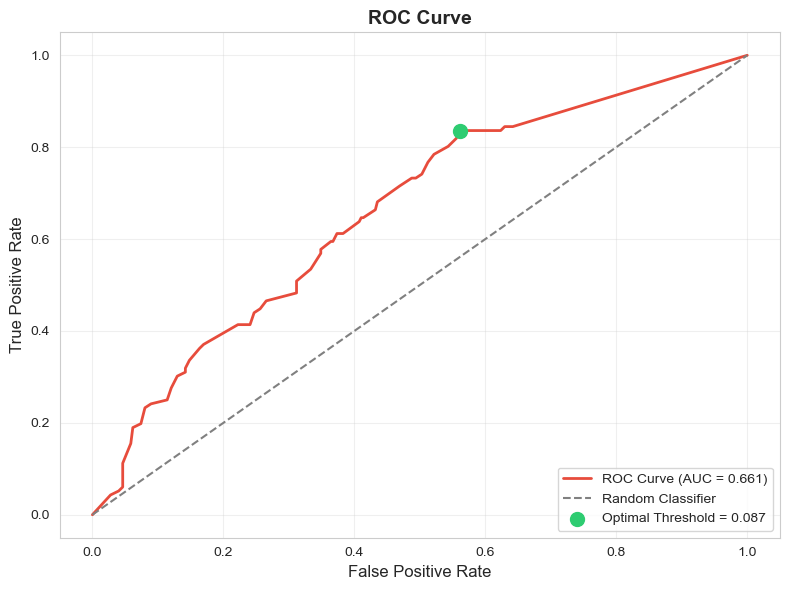

Optimal Threshold: 0.0870
At this threshold: TPR = 0.8362, FPR = 0.5617


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#e74c3c', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='#2ecc71', s=100, 
            marker='o', label=f'Optimal Threshold = {optimal_threshold:.3f}', zorder=5)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"At this threshold: TPR = {tpr[optimal_idx]:.4f}, FPR = {fpr[optimal_idx]:.4f}")

## Threshold Analysis

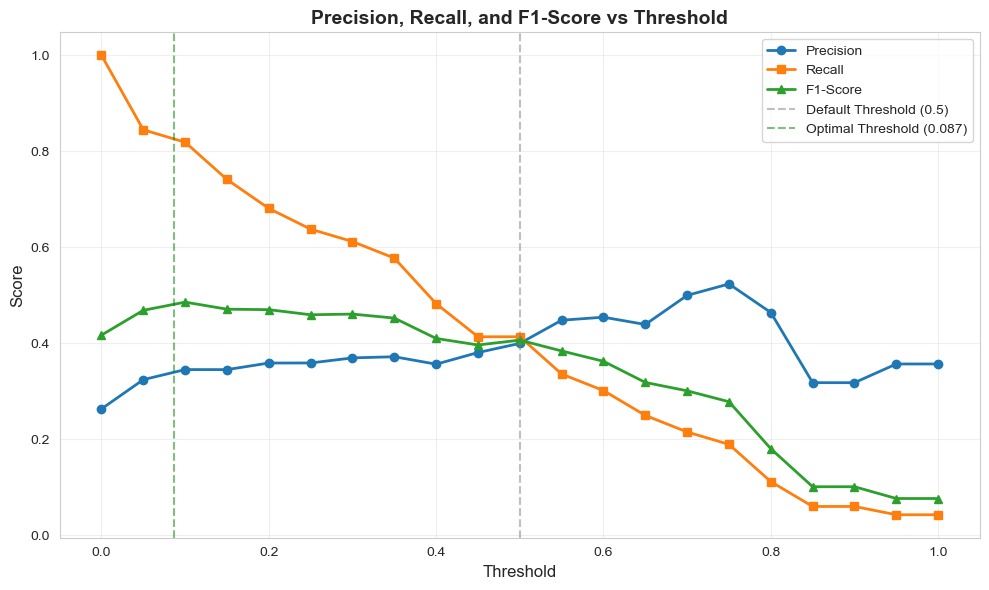

In [ ]:
thresholds_range = np.arange(0.0, 1.01, 0.05)
precision_scores = [precision_score(y_test, y_pred_proba >= t) for t in thresholds_range]
recall_scores = [recall_score(y_test, y_pred_proba >= t) for t in thresholds_range]
f1_scores = [f1_score(y_test, y_pred_proba >= t) for t in thresholds_range]

plt.figure(figsize=(10, 6))
plt.plot(thresholds_range, precision_scores, label='Precision', marker='o', linewidth=2)
plt.plot(thresholds_range, recall_scores, label='Recall', marker='s', linewidth=2)
plt.plot(thresholds_range, f1_scores, label='F1-Score', marker='^', linewidth=2)
plt.axvline(0.5, color='gray', linestyle='--', alpha=0.5, label='Default Threshold (0.5)')
plt.axvline(optimal_threshold, color='green', linestyle='--', alpha=0.5, 
            label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision, Recall, and F1-Score vs Threshold', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Decision Tree Visualizations

In [ ]:
# Text method

tree_rules = export_text(optimized_tree, feature_names=list(X_train.columns))
print("Decision Tree Rules:")
print("=" * 50)
print(tree_rules)

Decision Tree Rules:
|--- artist_popularity <= 75.50
|   |--- artist_popularity <= 60.50
|   |   |--- tempo <= 174.04
|   |   |   |--- liveness <= 0.39
|   |   |   |   |--- class: 0
|   |   |   |--- liveness >  0.39
|   |   |   |   |--- class: 0
|   |   |--- tempo >  174.04
|   |   |   |--- class: 0
|   |--- artist_popularity >  60.50
|   |   |--- genre_hip hop <= 0.50
|   |   |   |--- loudness <= 86.50
|   |   |   |   |--- genre_modern rock <= 0.50
|   |   |   |   |   |--- duration_ms <= 184959.50
|   |   |   |   |   |   |--- acousticness <= 0.04
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- acousticness >  0.04
|   |   |   |   |   |   |   |--- tempo <= 119.01
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- tempo >  119.01
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- duration_ms >  184959.50
|   |   |   |   |   |   |--- liveness <= 0.10
|   |   |   |   |   |   |   |--- duration_ms <= 198503.50
|   |   | 

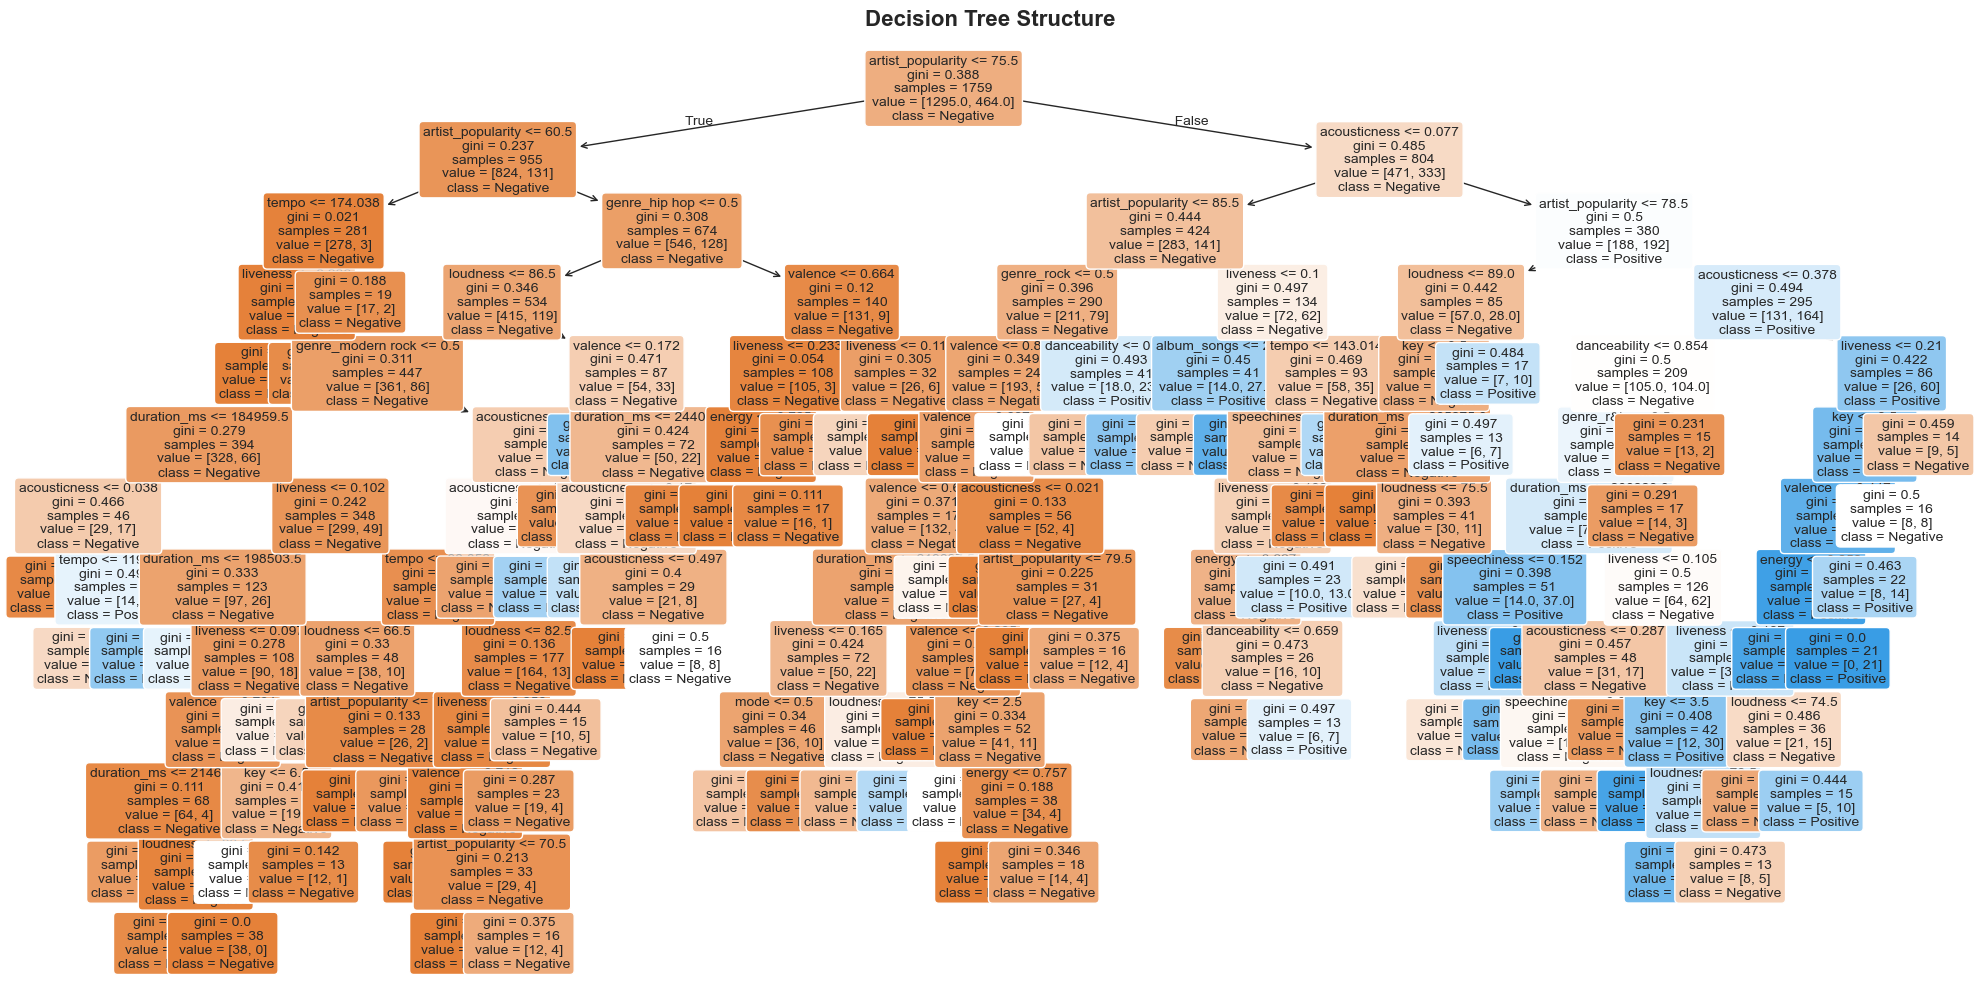


Tree Statistics:
Max depth: 12
Number of leaves: 80
Number of nodes: 159


In [ ]:
# Graphic

plt.figure(figsize=(20, 10))
plot_tree(optimized_tree, 
          feature_names=X_train.columns,
          class_names=['Negative', 'Positive'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Structure', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\nTree Statistics:")
print(f"Max depth: {optimized_tree.get_depth()}")
print(f"Number of leaves: {optimized_tree.get_n_leaves()}")
print(f"Number of nodes: {optimized_tree.tree_.node_count}")

## Cross-Validation Analysis

5-Fold Cross-Validation Results:
F1 Scores: [0.39779006 0.48888889 0.4198895  0.44444444 0.43617021]

Mean F1 Score: 0.4374
Std Dev:       0.0303
95% CI:        [0.3781, 0.4967]


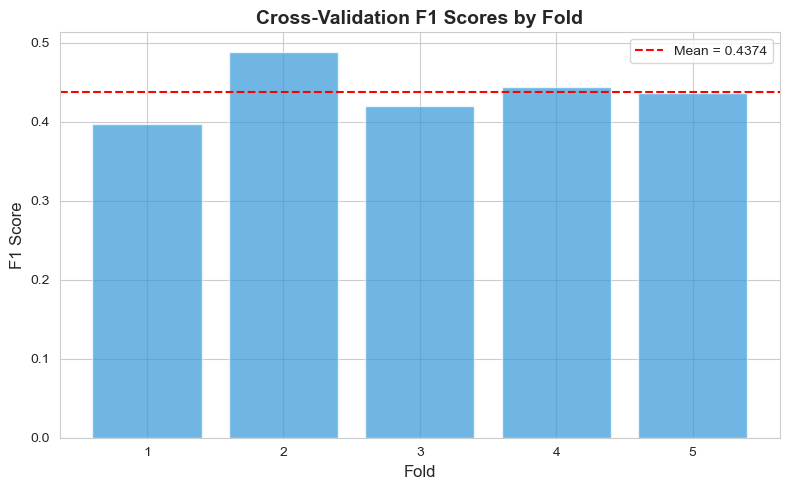

In [ ]:
cv_scores = cross_val_score(optimized_tree, X_train, y_train, cv=5, scoring='f1')

print("5-Fold Cross-Validation Results:")
print("=" * 50)
print(f"F1 Scores: {cv_scores}")
print(f"\nMean F1 Score: {cv_scores.mean():.4f}")
print(f"Std Dev:       {cv_scores.std():.4f}")
print(f"95% CI:        [{cv_scores.mean() - 1.96*cv_scores.std():.4f}, "
      f"{cv_scores.mean() + 1.96*cv_scores.std():.4f}]")

# If we want to see any major differences
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), cv_scores, color='#3498db', alpha=0.7)
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f'Mean = {cv_scores.mean():.4f}')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('Cross-Validation F1 Scores by Fold', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Final Model Summary
print("="*60)
print("FINAL MODEL SUMMARY")
print("="*60)
print(f"\nModel Type: Decision Tree Classifier")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")
print(f"Number of Features: {X_train.shape[1]}")
print(f"\nBest Hyperparameters:")
for param, value in optimized_tree.get_params().items():
    if param in ['max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion']:
        print(f"  {param}: {value}")
print(f"\nTest Set Performance:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_optimized):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_optimized):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_optimized):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"\nTree Complexity:")
print(f"  Max Depth: {optimized_tree.get_depth()}")
print(f"  Leaves:    {optimized_tree.get_n_leaves()}")
print(f"  Nodes:     {optimized_tree.tree_.node_count}")
print("="*60)

FINAL MODEL SUMMARY

Model Type: Decision Tree Classifier
Training Samples: 1759
Test Samples: 440
Number of Features: 29

Best Hyperparameters:
  criterion: gini
  max_depth: None
  min_samples_leaf: 13
  min_samples_split: 2

Test Set Performance:
  Accuracy:  0.7091
  Precision: 0.4388
  Recall:    0.3707
  F1-Score:  0.4019
  ROC-AUC:   0.6607

Tree Complexity:
  Max Depth: 12
  Leaves:    80
  Nodes:     159
